# Sentiment Analysis
followed mostly https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6

In [ ]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from transformers import pipeline
from wordcloud import WordCloud

nltk.download('stopwords')


In [4]:
reviews = pd.read_pickle("../data-clean/reviews.pkl")
reviews_features = pd.read_pickle("../data-clean/reviews_features.pkl")
review_languages = pd.read_pickle("../data-clean/review_languages.pkl")

reviews["language"] = review_languages
reviews.head()

,id,date,reviewer_id,reviewer_name,comments,language
listing_id,,,,,,
42932,6993655,2013-09-02,3815640,Christianne,We stayed in Cecilie's apartment for 2 weeks w...,en
42932,17374681,2014-08-11,6263186,Ange,The apt is absolutely beautiful and Cecilie we...,en
42932,24592137,2014-12-31,2092478,Anne-Marie,"The apartment was as described, nice and cozy....",en
42932,30332056,2015-04-20,8016527,Jennifer,We had an absolutely wonderful time at Cecilie...,en
42932,34892555,2015-06-13,21218589,Tere,Cecilie is the kindest and most generous host ...,en


In [5]:
print(reviews.shape)
reviews = reviews[reviews["comments"].notna()]
reviews.shape

(77783, 6)


(77701, 6)

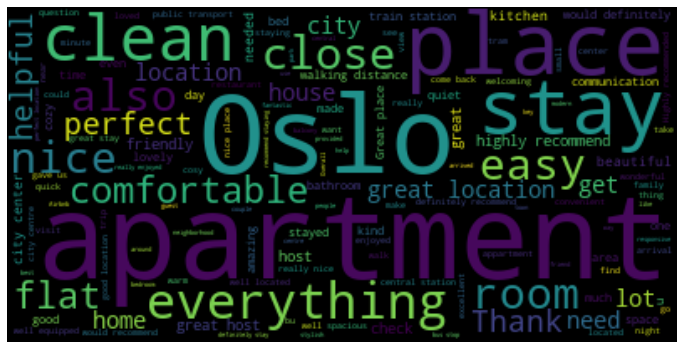

In [6]:
stops = set(stopwords.words('english'))
eng_comments = reviews["comments"][reviews["language"] == "en"]
stops.update(["br", "href"])
text = " ".join(i for i in eng_comments)
wordcloud = WordCloud(stopwords=stops).generate(text)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud_eng.png')
plt.show()

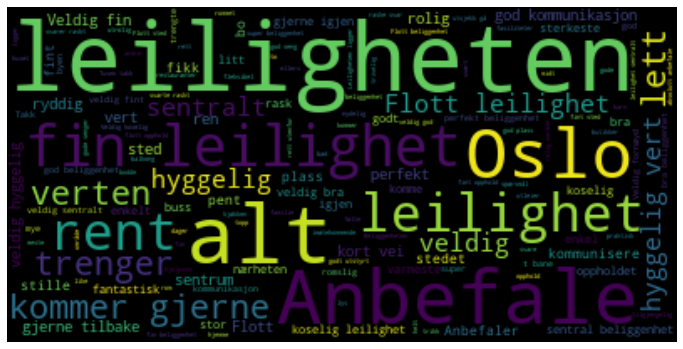

In [7]:
stops = set(stopwords.words('norwegian'))
nor_comments = reviews["comments"][reviews["language"] == "no"]
stops.update(["br", "href"])
text = " ".join(i for i in nor_comments)
wordcloud = WordCloud(stopwords=stops).generate(text)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud_nor.png')
plt.show()

In [8]:
length = []
for i in range(len(reviews["comments"])):
    length.append(len(reviews["comments"].iloc[i]))

length = np.array(length)

In [9]:
sentiment_analyizer = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
Downloading: 100%|██████████| 629/629 [00:00<00:00, 182kB/s]
Downloading: 100%|██████████| 255M/255M [00:38<00:00, 7.00MB/s] 
Downloading: 100%|██████████| 48.0/48.0 [00:00<00:00, 23.8kB/s]
Downloading: 100%|██████████| 226k/226k [00:00<00:00, 679kB/s] 


In [10]:
df = pd.DataFrame(columns=['listings_id', 'id', 'comment', 'label', 'score'])

In [ ]:
# decide if comment is positive or negative and save in new data frame
n = len(reviews["comments"])
for i in range(n):
    comment = reviews["comments"].iloc[i]

    try:
        result = sentiment_analyizer(comment)[0]
    except:
        label = "None"
        score = "None"
    else:
        label = result['label']
        score = result['score']

    new_row = {'listings_id': reviews["comments"].index[i], 'id': reviews["id"].iloc[i], 'comment': comment, 'label': label, 'score': score}
    df = df.append(new_row, ignore_index=True)

    if i % 100 == 0:
        print(i)

df = df.set_index('listings_id')

In [20]:
df["language"] = reviews["language"]
df

,id,comment,label,score,language
listings_id,,,,,
42932,6993655,We stayed in Cecilie's apartment for 2 weeks w...,POSITIVE,0.999883,en
42932,17374681,The apt is absolutely beautiful and Cecilie we...,POSITIVE,0.999879,en
42932,24592137,"The apartment was as described, nice and cozy....",POSITIVE,0.999838,en
42932,30332056,We had an absolutely wonderful time at Cecilie...,POSITIVE,0.999705,en
42932,34892555,Cecilie is the kindest and most generous host ...,POSITIVE,0.999842,en
...,...,...,...,...,...
52260296,458449962734377862,"We had a great stay, the apartment was large a...",POSITIVE,0.999471,en
52319045,459849131957446475,"Very nice apartment , with great view from the...",POSITIVE,0.999839,en
52366598,459886443009660402,"Veldig fin leilighet, lun og koselig. Kort gåt...",NEGATIVE,0.978796,no


In [21]:
df[df.language.isna()]

,id,comment,label,score,language
listings_id,,,,,
588353,231460932,.,POSITIVE,0.966878,<NA>
760266,565217521,.,POSITIVE,0.966878,<NA>
761018,54902302,-,POSITIVE,0.987241,<NA>
977648,192377350,.,POSITIVE,0.966878,<NA>
1226982,545965619,.,POSITIVE,0.966878,<NA>
...,...,...,...,...,...
50453286,411393826191071939,:),POSITIVE,0.648929,<NA>
50534156,406220714710960019,.,POSITIVE,0.966878,<NA>
51144124,421498554930485205,10,POSITIVE,0.98659,<NA>


In [22]:
df.label[df.language.isna()] = "None"
df.score[df.language.isna()] = "None"
df[df.language.isna()]

,id,comment,label,score,language
listings_id,,,,,
588353,231460932,.,None,None,<NA>
760266,565217521,.,None,None,<NA>
761018,54902302,-,None,None,<NA>
977648,192377350,.,None,None,<NA>
1226982,545965619,.,None,None,<NA>
...,...,...,...,...,...
50453286,411393826191071939,:),None,None,<NA>
50534156,406220714710960019,.,None,None,<NA>
51144124,421498554930485205,10,None,None,<NA>


In [25]:
df.comment[df.label == "None"]

listings_id
567731      (There is an english translation above.)\r<br/...
588353                                                      .
688070      Η φιλοξενία από την Μαρίτα ήταν καλή. <br/>Ήτα...
760266      We arrived in Oslo without knowing anybody, an...
760266                                                      .
                                  ...                        
50534156                                                    .
51144124                                                   10
51651768    Leiligheten hadde fin størrelse og hadde det m...
52231450                                                    .
52398627                                                    .
Name: comment, Length: 272, dtype: object

Because only 272 (thereof 189 without language, therefore no text) out of 77.701 reviews got the "None" label, I will not go into detail here and just leave it like this.

In [26]:
df.to_pickle(path="reviews_sentiment.pkl")